In [ ]:
import pandas as pd
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import numpy as np
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    _, ax = plt.subplots(1,1)

    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('accuracy', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

In [ ]:
data = pd.read_csv('drilling_data.csv', sep = ',')
data['Операция'].value_counts()

ПРОМЫВКА С ВРАЩЕНИЕМ                                                 942
НЕПОДВИЖНОЕ СОСТОЯНИЕ                                                515
ДОПУСК БУРИЛЬНОЙ КОЛОННЫ ДО ЗАБОЯ                                    507
ПРОМЫВКА ПРИ НЕПОДВИЖНОМ СОСТОЯНИИ                                   500
ПОДЪЕМ С ПРОМЫВКОЙ                                                   456
УДЕРЖАНИЕ НА КЛИНЬЯХ                                                 388
СПУСК С ПРОМЫВКОЙ                                                    385
СПУСК С ПРОРАБОТКОЙ                                                  316
РОТОРНОЕ БУРЕНИЕ                                                     305
ИНОЕ                                                                 239
НАРАЩИВАНИЕ                                                          236
ПОДЪЕМ С ПРОРАБОТКОЙ                                                 204
ПОДЪЕМ СВЕЧИ С ВРАЩЕНИЕМ И ЦИРКУЛЯЦИЕЙ НА ДЛИНУ СВЕЧИ                166
СПУСК В СКВАЖИНУ                                   

In [ ]:
path = 'data_pt.csv'
data = pd.read_csv(path, sep = ',')

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Группа,Буровая площадка
0,-0.835556,1.299554,-0.826346,-1.061063,0.165679,0.081480,0.558843,-0.208406,1.273678,-1.046851,-0.141595,-0.030329,5,0
1,-0.298457,-0.676521,-0.147957,0.305459,-1.556693,-1.637819,0.558843,-0.208406,-0.774938,-1.046851,-0.141595,-0.029503,4,0
2,1.208514,-0.951073,0.106728,0.078533,-1.556693,-1.603945,0.558843,-0.208406,-1.413315,-1.046851,-0.141595,-0.030606,3,0
3,1.208514,-0.951073,0.106728,0.078533,-1.556693,-1.603945,0.558843,-0.208406,-1.413315,-1.046851,-0.141595,-0.030606,3,0
4,1.208514,-0.951073,0.106728,0.078533,-1.556693,-1.603945,0.558843,-0.208406,-1.413315,-1.046851,-0.141595,-0.030606,3,0


In [ ]:
target = 'Группа'
train_data = data[data['Буровая площадка'] != 9].drop(columns=['Буровая площадка'])
test_data = data[data['Буровая площадка'] == 9].drop(columns=['Буровая площадка'])
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11
4029,-0.165171,-0.951073,-1.278547,-1.036964,-1.556693,-1.852084,-0.616194,-0.208406,-1.413315,0.595426,-0.141595,-0.074846
4030,-0.298457,-0.951073,-1.316035,-1.013278,-1.556693,-1.850402,-0.616194,-0.208406,-1.413315,0.585273,-0.141595,-0.030329
4031,0.887113,-0.951073,-1.323774,-0.990001,-1.556693,-1.817188,-0.616194,-0.208406,-1.413315,0.391099,-0.141595,-0.029778
4032,-0.835556,-0.951073,-1.316035,-0.990001,-1.556693,-1.816368,-0.616194,-0.208406,-1.413315,0.391099,-0.141595,-0.025436
4033,-0.594840,-0.951073,-1.316035,-0.990001,-1.556693,-1.816368,-0.616194,-0.208406,-1.413315,0.391099,-0.141595,-0.029228
...,...,...,...,...,...,...,...,...,...,...,...,...
5695,-0.017810,-0.951073,-1.278547,-0.990001,-1.556693,-1.943971,5.400239,-15507.356262,-1.413315,0.405456,-0.141595,0.105816
5696,-0.089042,-0.951073,-1.278547,-0.990001,-1.556693,-1.943971,5.040439,-126.182820,-1.413315,0.405456,-0.141595,0.105816
5697,-0.089042,-0.951073,-1.278547,-0.990001,-1.556693,-1.943971,5.040439,-126.182820,-1.413315,0.405456,-0.141595,0.105816
5698,-0.089042,-0.951073,-1.278547,-0.990001,-1.556693,-1.943971,5.040439,-126.182820,-1.413315,0.405456,-0.141595,0.105816


In [ ]:
X_train.shape

(4029, 12)

In [ ]:
y_train.value_counts()

1    1217
5     953
2     788
0     535
4     344
3     192
Name: Группа, dtype: int64

In [ ]:
modelSVC = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
modelGrid = GridSearchCV(modelSVC,param_grid[0],scoring='accuracy',cv=5)
modelGrid.fit(X_train,y_train)
print(modelGrid.best_score_)
print(modelGrid.best_params_)

0.5391375718367637
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
print(classification_report(y_test, modelGrid.best_estimator_.predict(X_test), digits=4))

NameError: ignored

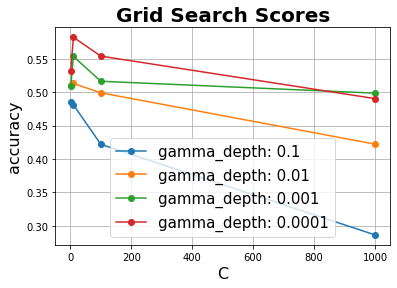

In [ ]:
plot_grid_search(modelGrid.cv_results_, [1, 10, 100, 1000], [1e-1, 1e-2, 1e-3, 1e-4], 'C', 'gamma_depth')

In [ ]:
################## RESULT
# XGBClassifier(max_depth=4, learning_rate=0.2, n_estimators=300)
## XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=100)
model1 = XGBClassifier(max_depth=4, learning_rate=0.2, n_estimators=300)
model1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print(classification_report(y_test, model1.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.7630    0.7863    0.7744       131
           1     0.7619    0.5872    0.6632       109
           2     0.9286    1.0000    0.9630        39
           3     0.4043    1.0000    0.5758        19
           4     1.0000    0.8000    0.8889         5
           5     0.0000    0.0000    0.0000         3
           6     0.0000    0.0000    0.0000        31
           7     0.5899    0.6954    0.6383       151
           8     0.9919    0.9839    0.9879       124
           9     1.0000    0.9861    0.9930        72
          10     0.9375    0.9677    0.9524        31
          11     0.9818    0.8852    0.9310        61
          12     0.8431    1.0000    0.9149        43
          13     0.9429    1.0000    0.9706        33
          14     0.9970    1.0000    0.9985       330
          15     1.0000    0.9937    0.9968       159
          16     0.9818    0.9818    0.9818        55
          17     1.0000    

In [ ]:
import pickle

In [ ]:
pickle.dump(model1, open("operations.pickle.dat", "wb"))

In [ ]:
modelXGB = XGBClassifier()
param_grid = [
    {'n_estimators':[10,20,30,100,150,200,300],
     'max_depth':[2,3,4,5,6,7],
     'learning_rate': [0.2]}
]
modelGrid = GridSearchCV(modelXGB,param_grid[0], scoring='accuracy',cv=5)
modelGrid.fit(X_train,y_train)
print(modelGrid.best_score_)
print(modelGrid.best_params_)

KeyboardInterrupt: ignored

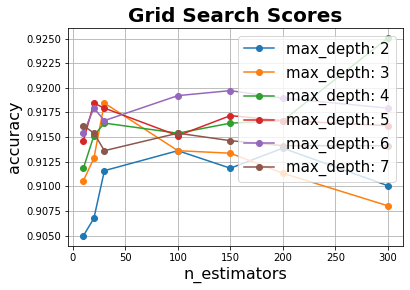

In [ ]:
plot_grid_search(modelGrid.cv_results_, [10,20,30,100,150,200,300], [2,3,4,5,6,7], 'n_estimators', 'max_depth')

In [ ]:
print(classification_report(y_test, modelGrid.best_estimator_.predict(X_test), digits=4))

              precision    recall  f1-score   support

          11     0.9818    0.9818    0.9818        55
          12     1.0000    0.6667    0.8000         6
          13     0.8889    0.8696    0.8791        46
          14     0.3333    0.2500    0.2857         8
          21     0.7647    0.7939    0.7790       131
          22     0.8197    0.4587    0.5882       109
          23     0.5571    1.0000    0.7156        39
          24     1.0000    1.0000    1.0000        19
          25     1.0000    0.8000    0.8889         5
          26     0.0000    0.0000    0.0000         3
          27     0.0000    0.0000    0.0000        31
          28     0.5650    0.7483    0.6439       151
          31     0.9918    0.9758    0.9837       124
          32     1.0000    0.9306    0.9640        72
          33     0.9091    0.9677    0.9375        31
          34     0.9818    0.8852    0.9310        61
          35     0.7818    1.0000    0.8776        43
          36     0.8571    

In [ ]:
modelLR = LogisticRegression(solver='liblinear', max_iter=200)
param_grid = [
    {'penalty': ['l1','l2'], 
     'C': [0.001,0.01,0.1,1,10,100,1000]}
]
modelGrid = GridSearchCV(modelLR,param_grid[0],scoring='accuracy',cv=5)
modelGrid.fit(X_train,y_train)
print(modelGrid.best_score_)
print(modelGrid.best_params_)

0.5038480640355008
{'C': 0.1, 'penalty': 'l1'}


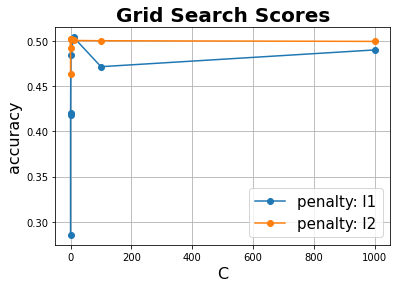

In [ ]:
plot_grid_search(modelGrid.cv_results_, [0.001,0.01,0.1,1,10,100,1000], ['l1','l2'], 'C', 'penalty')

In [ ]:
print(classification_report(y_test, modelGrid.best_estimator_.predict(X_test), digits=4))

              precision    recall  f1-score   support

           1     0.7778    0.7304    0.7534       115
           2     0.3910    0.1066    0.1675       488
           3     0.4155    0.7522    0.5353       343
           4     0.6377    1.0000    0.7788        44
           5     0.6017    0.8129    0.6915       171
           6     0.5881    0.5869    0.5875       489

    accuracy                         0.5236      1650
   macro avg     0.5686    0.6648    0.5857      1650
weighted avg     0.5099    0.5236    0.4799      1650



In [ ]:
from keras.models import Model,Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras.callbacks import CSVLogger
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf

from keras import optimizers

In [ ]:
def generate_array(y_data):
  y_res = []
  for ln in y_data - 1:
     y = [0, 0, 0, 0, 0, 0]
     y[ln] = 1
     y_res.append(y)
  return np.array(y_res)

In [ ]:
model2 = Sequential()

model2.add(Dense(12, input_dim=12, activation='relu'))

model2.add(Dense(64))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dense(256))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dropout(0.75))

model2.add(Dense(128))
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Dropout(0.5))

model2.add(Dense(6))
model2.add(Activation('softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer= optimizers.Adagrad(lr=0.05),
              metrics=['accuracy'])

In [ ]:
csv_logger = CSVLogger('training.log')

X = X_train
Y = generate_array(y_train)
X = X.values

model2.fit(X, Y, validation_data = (X_test.values, generate_array(y_test)), epochs=150, batch_size=10, verbose=2, callbacks=[csv_logger])

Epoch 1/150
403/403 - 2s - loss: 1.5455 - accuracy: 0.3423 - val_loss: 1.3778 - val_accuracy: 0.3076
Epoch 2/150
403/403 - 1s - loss: 1.3331 - accuracy: 0.3929 - val_loss: 1.3426 - val_accuracy: 0.2992
Epoch 3/150
403/403 - 1s - loss: 1.2910 - accuracy: 0.4031 - val_loss: 1.2848 - val_accuracy: 0.3561
Epoch 4/150
403/403 - 1s - loss: 1.2513 - accuracy: 0.4252 - val_loss: 1.2886 - val_accuracy: 0.3423
Epoch 5/150
403/403 - 1s - loss: 1.2503 - accuracy: 0.4314 - val_loss: 1.2665 - val_accuracy: 0.3309
Epoch 6/150
403/403 - 1s - loss: 1.2286 - accuracy: 0.4512 - val_loss: 1.4094 - val_accuracy: 0.2681
Epoch 7/150
403/403 - 1s - loss: 1.1889 - accuracy: 0.4726 - val_loss: 1.2688 - val_accuracy: 0.3399
Epoch 8/150
403/403 - 1s - loss: 1.1967 - accuracy: 0.4669 - val_loss: 1.2782 - val_accuracy: 0.3333
Epoch 9/150
403/403 - 1s - loss: 1.1916 - accuracy: 0.4641 - val_loss: 1.3006 - val_accuracy: 0.3190
Epoch 10/150
403/403 - 1s - loss: 1.1744 - accuracy: 0.4815 - val_loss: 1.2667 - val_accura

KeyboardInterrupt: ignored

In [ ]:
from keras.layers import Dense,Dropout,Activation,Conv1D,MaxPooling1D,Flatten,MaxPool1D,BatchNormalization,LeakyReLU

In [ ]:
X_tr = np.expand_dims(X_train, axis=2)
X_tst = np.expand_dims(X_test, axis=2)

model = Sequential([
    
    Conv1D(64, 2, strides=1,input_shape =(12,1)), 
    Activation("relu"), 
    BatchNormalization(),
    #MaxPool1D(2,1),
   

    Conv1D(64, 2, strides=1,padding="same"), 
    Activation("relu"), 
    BatchNormalization(),
    #MaxPool1D(2,1),
    Dropout(0.3),
    
    Conv1D(64,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    MaxPooling1D(3,1),
   
   
    Conv1D(128,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    #MaxPooling1D(2,1),
    
    
    Conv1D(128,2,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(128,1,strides=1,padding="same"),
    Activation("relu"), 
    BatchNormalization(),
    MaxPooling1D(1,1),
    
    
    Flatten(), 
    Dense(2500),
    Activation("relu"),
    BatchNormalization(),
   
    Dropout(0.3),
    Dense(1500),
    Activation("relu"),
    
    Dense(6),
    Activation("softmax"),
    
])
model.summary()
model.compile(loss='categorical_crossentropy',optimizer="adagrad",metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 11, 64)            192       
_________________________________________________________________
activation_10 (Activation)   (None, 11, 64)            0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 11, 64)            256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            8256      
_________________________________________________________________
activation_11 (Activation)   (None, 11, 64)            0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 64)           

In [ ]:
model.fit(X_tr,generate_array(y_train),shuffle=True,validation_data = (X_tst, generate_array(y_test)),batch_size=20,epochs=1000)

Epoch 1/2000
63/63 [==============================] - 11s 126ms/step - loss: 1.9953 - accuracy: 0.2289 - val_loss: 1.6663 - val_accuracy: 0.2920
Epoch 2/2000
63/63 [==============================] - 9s 147ms/step - loss: 1.7044 - accuracy: 0.3047 - val_loss: 1.6034 - val_accuracy: 0.2926
Epoch 3/2000
63/63 [==============================] - 8s 128ms/step - loss: 1.6385 - accuracy: 0.3132 - val_loss: 1.5958 - val_accuracy: 0.2926
Epoch 4/2000
50/63 [======================>.......] - ETA: 1s - loss: 1.5713 - accuracy: 0.3359

KeyboardInterrupt: ignored